In [13]:
import gensim
import logging
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
# use gensim==3.8, there is a problem when using intersect_word2vec_format in gensim==4.0 

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [14]:
data_file = "../processed/comments.pkl"
df = pd.read_pickle(data_file)

In [15]:
sentences = df['comment'].astype('str').tolist()
print(len(sentences))
tokenizer = RegexpTokenizer(r'\w+')
sentences_tokenized = [w.lower() for w in sentences]
sentences_tokenized = [tokenizer.tokenize(i) for i in sentences_tokenized]

53318


In [16]:
for i in range(5):
    print(sentences_tokenized[i])

['i', 'think', 'that', 'if', 'you', 'can', 'organic', 'and', 'local', 'is', 'best']
['why', 'am', 'i', 'not', 'shocked', 'lol']
['oh', 'this', 'is', 'going', 'to', 'get', 'good', 'but', 'i', 'will', 'say', 'this', 'my', 'first', 'husband', 'now', 'my', 'ex', 'worked', 'as', 'security', 'on', 'a', 'farm', 'in', 'nor', 'cal', 'one', 'row', 'was', 'organic', 'then', 'there', 'was', 'dirt', 'the', 'row', 'on', 'the', 'other', 'side', 'wasnt', 'yet', 'they', 'came', 'from', 'the', 'same', 'farm', 'i', 'love', 'to', 'edit', 'photos', 'and', 'make', 'siggys', 'pm', 'me', 'some', 'pics', 'and', 'what', 'you', 'want', 'on', 'it', 'and', 'i', 'will', 'make', 'you', 'more', 'then', 'one', 'to', 'choose', 'from']
['they', 'are', 'only', 'talking', 'about', 'the', 'general', 'nutrients', 'themselves', 'this', 'does', 'not', 'include', 'all', 'of', 'the', 'pesticides', 'antibiotics', 'gene', 'splicing', 'maybe', 'organic', 'is', 'not', 'fruits', 'and', 'veggies', 'do', 'not', 'have', 'a', 'higher', 

In [29]:
model = Word2Vec(size=300, min_count=5)
model.build_vocab(sentences_tokenized)
total_examples = model.corpus_count

2021-04-25 13:09:43,912 : INFO : collecting all words and their counts
2021-04-25 13:09:43,913 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-04-25 13:09:44,063 : INFO : PROGRESS: at sentence #10000, processed 712286 words, keeping 26512 word types
2021-04-25 13:09:44,232 : INFO : PROGRESS: at sentence #20000, processed 1547202 words, keeping 36968 word types
2021-04-25 13:09:44,400 : INFO : PROGRESS: at sentence #30000, processed 2327286 words, keeping 47302 word types
2021-04-25 13:09:44,562 : INFO : PROGRESS: at sentence #40000, processed 3162538 words, keeping 54048 word types
2021-04-25 13:09:44,671 : INFO : PROGRESS: at sentence #50000, processed 3719389 words, keeping 58342 word types
2021-04-25 13:09:44,714 : INFO : collected 59861 word types from a corpus of 3919170 raw words and 53318 sentences
2021-04-25 13:09:44,716 : INFO : Loading a fresh vocabulary
2021-04-25 13:09:45,052 : INFO : effective_min_count=5 retains 19160 unique words (32% of o

In [30]:
# print example
print(model.wv.vectors.shape)   # model.wv.vectors == model.wv.syn0
# (59861, 300) for min_count=1
# print(model.wv['organic'])
# print(model.wv.index2word[100], model.wv.vectors[100])
before_example = model.wv['why']
# print(before_example)

(19160, 300)


In [44]:
# TODO: actually PCA should be run on the whole corpus
def plot_pca_samples(model, word_list):
    '''
    model: Word2Vec
    word_list: a list of words
    '''
    X = model.wv[word_list]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    pyplot.scatter(result[:, 0], result[0:, 1])
    for i, word in enumerate(word_list):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    pyplot.show()

['they', 'came', 'from', 'same', 'love', 'edit', 'photos', 'make', 'pm', 'me', 'some', 'pics', 'what', 'want', 'it', 'more', 'choose', 'are', 'only', 'talking', 'about', 'general', 'nutrients', 'themselves', 'does', 'include', 'all', 'of', 'pesticides', 'antibiotics', 'gene', 'splicing', 'maybe', 'fruits', 'veggies', 'do', 'have', 'higher', 'nutritional', 'value', 'sure', 'hell', 'safer', 'eat', 'mrs', 'khan', 'took', 'words', 'out', 'mouth']


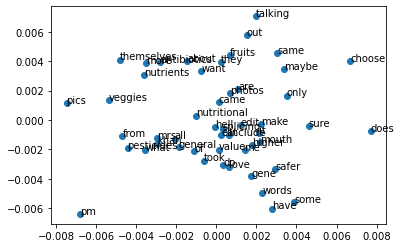

In [41]:
draw_vocab = list(model.wv.vocab)[50:100]
print(draw_vocab)
X = model.wv[draw_vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[0:, 1])
for i, word in enumerate(draw_vocab):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [42]:
# model_pretrained = KeyedVectors.load_word2vec_format("../wv/GoogleNews-vectors-negative300.bin.gz", binary=True)
# model.build_vocab([list(model_pretrained.vocab.keys())], update=True)     # why size of vocab remains the same?
model.intersect_word2vec_format('../wv/GoogleNews-vectors-negative300.bin.gz', binary=True, lockf=1.0)
# pre-trained word2vec models can be downloaded from https://code.google.com/archive/p/word2vec/

2021-04-25 13:18:38,536 : INFO : loading projection weights from ../wv/GoogleNews-vectors-negative300.bin.gz
2021-04-25 13:20:15,250 : INFO : merged 17759 vectors into (19160, 300) matrix from ../wv/GoogleNews-vectors-negative300.bin.gz


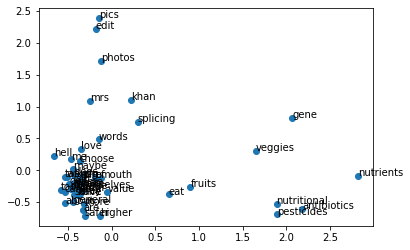

In [46]:
# see the difference between pre-trained model and initialization
plot_pca_samples(model, draw_vocab)

In [47]:
model.train(sentences_tokenized, total_examples=total_examples, epochs=5)

2021-04-25 13:25:36,018 : INFO : training model with 3 workers on 19160 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2021-04-25 13:25:37,108 : INFO : EPOCH 1 - PROGRESS: at 12.12% examples, 289517 words/s, in_qsize 5, out_qsize 0
2021-04-25 13:25:38,132 : INFO : EPOCH 1 - PROGRESS: at 22.80% examples, 331685 words/s, in_qsize 5, out_qsize 0
2021-04-25 13:25:39,152 : INFO : EPOCH 1 - PROGRESS: at 33.22% examples, 345971 words/s, in_qsize 5, out_qsize 0
2021-04-25 13:25:40,165 : INFO : EPOCH 1 - PROGRESS: at 47.50% examples, 348942 words/s, in_qsize 5, out_qsize 0
2021-04-25 13:25:41,192 : INFO : EPOCH 1 - PROGRESS: at 57.97% examples, 352315 words/s, in_qsize 5, out_qsize 0
2021-04-25 13:25:42,199 : INFO : EPOCH 1 - PROGRESS: at 68.40% examples, 355322 words/s, in_qsize 5, out_qsize 0
2021-04-25 13:25:43,205 : INFO : EPOCH 1 - PROGRESS: at 83.63% examples, 357406 words/s, in_qsize 5, out_qsize 0
2021-04-25 13:25:44,205 : INFO : EPOCH 1 - PROGRESS: at 99.

(14656527, 19595850)

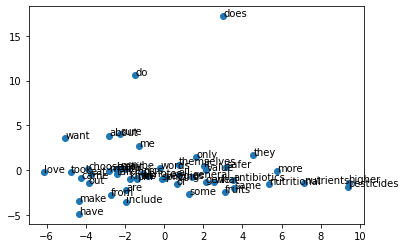

In [48]:
# see the difference between pre-trained and fine-tuning 
plot_pca_samples(model, draw_vocab)

In [14]:
# save model, change the file names to indicate specific models
model.save("../wv/w2v_comment_raw.model")

2021-04-25 00:59:36,075 : INFO : saving Word2Vec object under ../wv/w2v_comment_raw.model, separately None
2021-04-25 00:59:36,076 : INFO : not storing attribute vectors_norm
2021-04-25 00:59:36,077 : INFO : not storing attribute cum_table
2021-04-25 00:59:36,737 : INFO : saved ../wv/w2v_comment_raw.model
